In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
%matplotlib inline

In [2]:
consumer_key = "xx"
consumer_secret = "xx"
access_key = "xx"
access_secret = "xx"

In [3]:
def twitter_setup():
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key,access_secret)
    
    api = tweepy.API(auth)
    return api

In [4]:
screen_name="narendramodi"

In [5]:
def get_all_tweets(screen_name):
    
    api = twitter_setup()
    
    tweets = []
    new_tweets = api.user_timeline(screen_name=screen_name,count=200) #scrape 200 tweets at a time
    tweets.extend(new_tweets)
    
    oldest = tweets[-1].id-1
    
    while(len(new_tweets)>0):
        print(f"Getting tweets before {oldest}")
        
        new_tweets = api.user_timeline(screen_name,count=200,max_id=oldest)
        tweets.extend(new_tweets)
        oldest=tweets[-1].id-1
        print(f"Number of Tweets downloaded so far: {len(tweets)}")
        
    return tweets

tweets = get_all_tweets(screen_name)


Getting tweets before 1129328895797317631
Number of Tweets downloaded so far: 400
Getting tweets before 1124730078280048639
Number of Tweets downloaded so far: 600
Getting tweets before 1119521087056957441
Number of Tweets downloaded so far: 800
Getting tweets before 1114819039170187263
Number of Tweets downloaded so far: 1000
Getting tweets before 1110185375492800517
Number of Tweets downloaded so far: 1200
Getting tweets before 1103605159672733695
Number of Tweets downloaded so far: 1400
Getting tweets before 1096753823211606016
Number of Tweets downloaded so far: 1600
Getting tweets before 1089074658001985535
Number of Tweets downloaded so far: 1800
Getting tweets before 1083565099158306815
Number of Tweets downloaded so far: 2000
Getting tweets before 1076514661208453119
Number of Tweets downloaded so far: 2200
Getting tweets before 1068350072033701889
Number of Tweets downloaded so far: 2400
Getting tweets before 1062906847705722881
Number of Tweets downloaded so far: 2600
Getting

In [6]:
print(f"5 recent tweets by {screen_name}")

for tweet in tweets[:5]:
    print(tweet.text)
    print()

5 recent tweets by narendramodi
Greetings to my sisters and brothers of Andhra Pradesh. From science to sports, education to enterprise, AP’s contr… https://t.co/pD7z8me3mh

On Telangana’s Statehood Day, my best wishes to the people of this wonderful state. Telangana is known for its hard… https://t.co/AkjYlsDnR4

Thank you @PMBhutan for accepting our invitation to grace the Swearing-in Ceremony. Bhutan is India's trusted frien… https://t.co/mmbD12W1wN

Thank you President Md Abdul Hamid, for gracing our Swearing-in Ceremony. 

Our talks today were extensive and prod… https://t.co/elY68o0Usl

Had a very warm and productive meeting with PM @kpsharmaoli. 

Thank you for your gracious presence at the Swearing… https://t.co/1EhfZkfS6O



In [7]:
data = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=["Tweets"])
display(data.head(10))

,Tweets
0,Greetings to my sisters and brothers of Andhra...
1,"On Telangana’s Statehood Day, my best wishes t..."
2,Thank you @PMBhutan for accepting our invitati...
3,"Thank you President Md Abdul Hamid, for gracin..."
4,Had a very warm and productive meeting with PM...
5,"People first, people always. \n\nGlad that pat..."
6,Our Government’s first decision dedicated to t...
7,Heartfelt thanks to Prime Minister Pravind Jug...
8,Thank you President @MaithripalaS for gracing ...
9,Held extensive deliberations with the Presiden...


In [8]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
# Add relevant data to the pandas dataframe
data['length'] = np.array([len(tweet.text) for tweet in tweets])

data['ID'] = np.array([tweet.id for tweet in tweets])

data['Date'] = np.array([tweet.created_at for tweet in tweets])

data['Source'] = np.array([tweet.source for tweet in tweets])

data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])

data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

data.head(10)

,Tweets,length,ID,Date,Source,Likes,RTs
0,Greetings to my sisters and brothers of Andhra...,140,1135027705651572737,2019-06-02 03:37:47,Twitter for iPhone,68969,6763
1,"On Telangana’s Statehood Day, my best wishes t...",140,1135027438310830080,2019-06-02 03:36:43,Twitter for iPhone,52839,5804
2,Thank you @PMBhutan for accepting our invitati...,140,1134500155170938880,2019-05-31 16:41:29,Twitter for iPhone,68282,6144
3,"Thank you President Md Abdul Hamid, for gracin...",140,1134499818469023750,2019-05-31 16:40:09,Twitter for iPhone,30081,3176
4,Had a very warm and productive meeting with PM...,140,1134499299654610944,2019-05-31 16:38:05,Twitter for iPhone,29946,3301
5,"People first, people always. \n\nGlad that pat...",140,1134467494838620163,2019-05-31 14:31:42,Twitter Web Client,51078,10856
6,Our Government’s first decision dedicated to t...,139,1134432445141381120,2019-05-31 12:12:26,Twitter Media Studio,107043,18623
7,Heartfelt thanks to Prime Minister Pravind Jug...,140,1134402658737971201,2019-05-31 10:14:04,Twitter Web Client,45468,4979
8,Thank you President @MaithripalaS for gracing ...,140,1134401248256376832,2019-05-31 10:08:28,Twitter Web Client,29701,3455
9,Held extensive deliberations with the Presiden...,139,1134156292178763776,2019-05-30 17:55:06,Twitter for iPhone,45433,5908


In [10]:
mean = np.mean(data['length'])
print(f"The mean length of tweets is {mean} characters")

The mean length of tweets is 127.36185438705662 characters


In [11]:
most_liked = np.max(data['Likes'])
most_retweeted = np.max(data['RTs'])

# get the index for these tweets
index_ml = data[data.Likes == most_liked].index[0]
index_mrt = data[data.RTs == most_retweeted].index[0]

#Print the result
print(f"The most liked tweet is: {data['Tweets'][index_ml]}")
print(f"Number of likes: {most_liked}")
print("------------------")
print()

#Print the most retweeted tweet
print(f"The most retweeted tweet is: {data['Tweets'][index_mrt]}")
print(f"Number of retweets: {most_retweeted}")
print("------------------")
print()

The most liked tweet is: सबका साथ + सबका विकास + सबका विश्वास = विजयी भारत

Together we grow. 

Together we prosper. 

Together we will buil… https://t.co/orKx7u7syJ
Number of likes: 427419
------------------

The most retweeted tweet is: सबका साथ + सबका विकास + सबका विश्वास = विजयी भारत

Together we grow. 

Together we prosper. 

Together we will buil… https://t.co/orKx7u7syJ
Number of retweets: 121633
------------------



In [12]:
likes = pd.Series(data=data['Likes'].values,index=data['Date'])
retweets = pd.Series(data = data['RTs'].values,index=data['Date'])

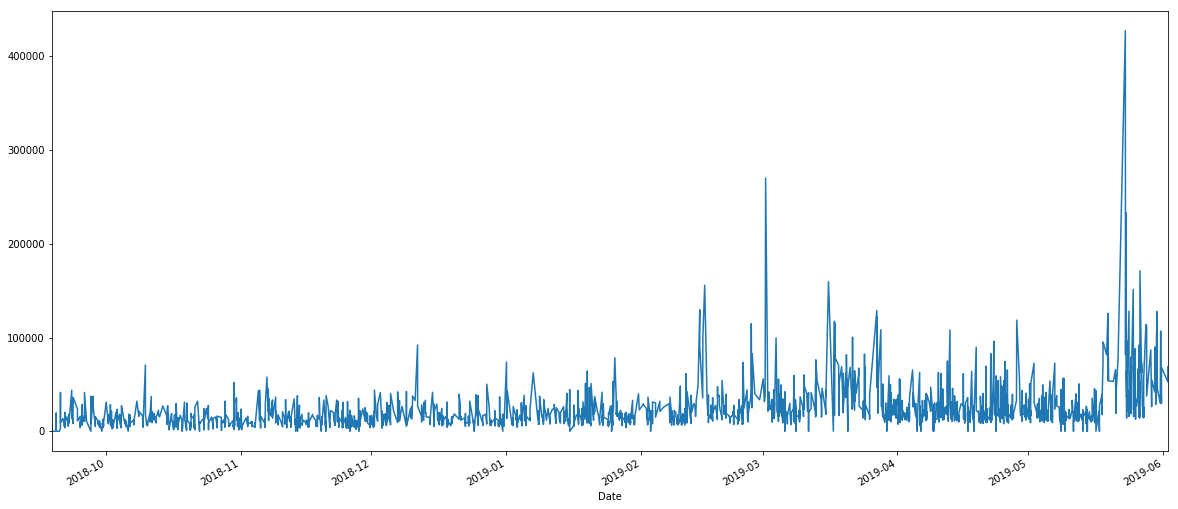

In [13]:
likes.plot(figsize=(20,9))

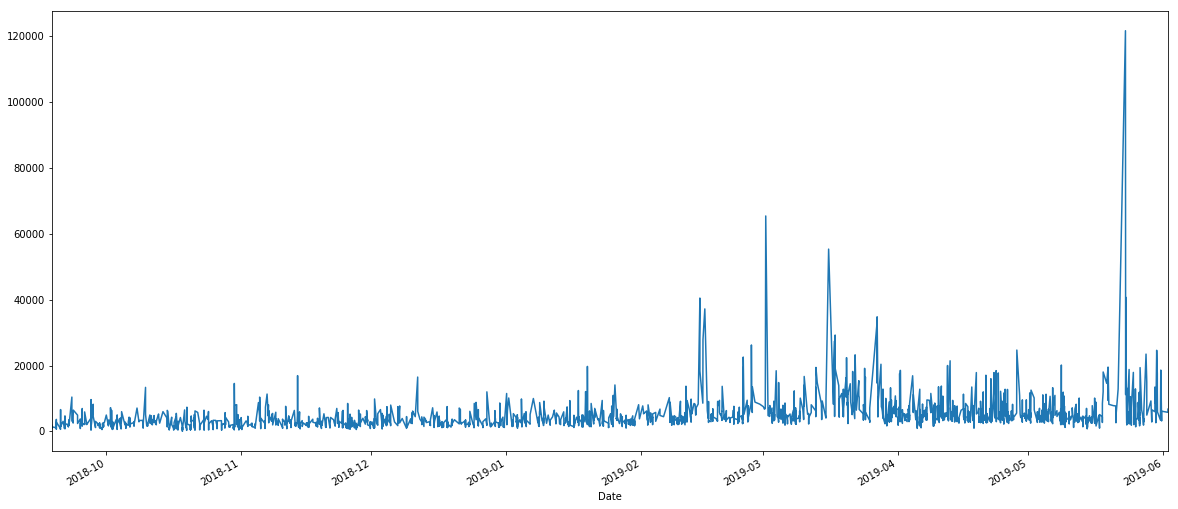

In [14]:
retweets.plot(figsize=(20,9))

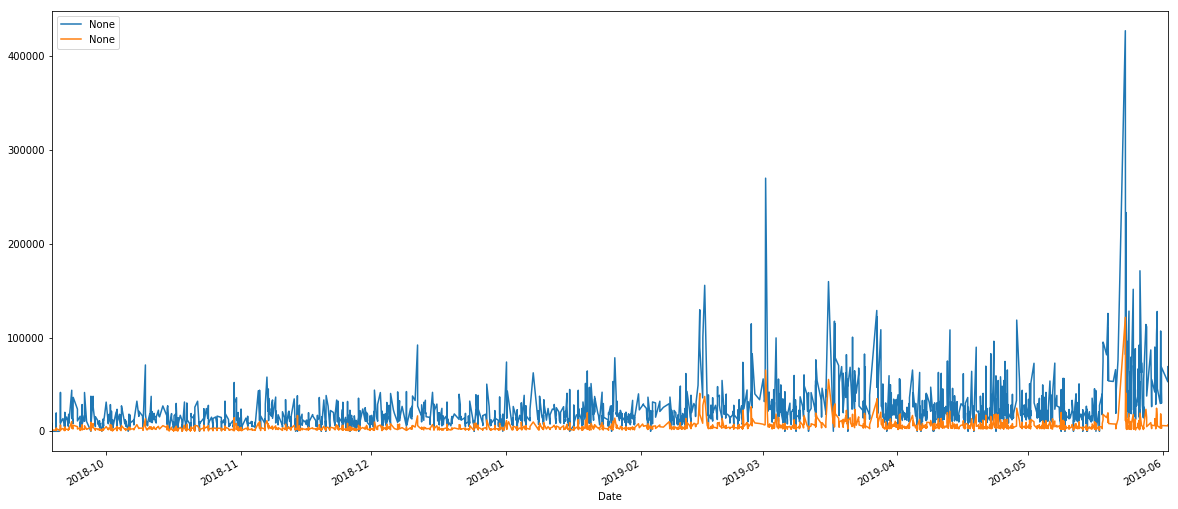

In [15]:
likes.plot(figsize=(20,9),legend=True)
retweets.plot(figsize=(20,9),legend=True)

In [16]:
data.isnull().any()

Tweets    False
length    False
ID        False
Date      False
Source    False
Likes     False
RTs       False
dtype: bool

In [17]:
data.describe()

,length,ID,Likes,RTs
count,3214.000000,3.214000e+03,3214.000000,3214.000000
mean,127.361854,1.088893e+18,17610.354076,3960.049471
std,23.500920,2.806551e+16,20019.863251,4379.638029
min,33.000000,1.042058e+18,0.000000,41.000000
25%,126.000000,1.062701e+18,7151.250000,1801.250000
50%,140.000000,1.088791e+18,12676.500000,3016.500000
75%,140.000000,1.114712e+18,20740.250000,4638.000000
max,148.000000,1.135028e+18,427419.000000,121633.000000


In [18]:
# how many times does Modi talk about Swachh Bharat

swachh_count = data.Tweets[data.Tweets.str.contains('Swachh',flags=re.IGNORECASE)].count()
print(f"PM Modi has tweeted about Swachh Bharat {swachh_count} times.")
print("--------------------------------")
print()
data.Tweets[data.Tweets.str.contains('Swachh', flags=re.IGNORECASE)]

PM Modi has tweeted about Swachh Bharat 14 times.
--------------------------------



1301    ‘Swachh Kumbh, Swachh Aabhaar’ was a great pla...
1305    Addressing the ‘Swachh Kumbh, Swachh Aabhaar’ ...
1414    You’ve heard of many competitions but we’ve be...
1420    The Swachh Shakti- 2019 in Haryana’s Kurukshet...
1714    Here is a unique contest that strengthens the ...
1737    The Sulabh International family has added imme...
1893    When Jabalpur has passionate citizens like you...
3032    The stupendous efforts of the @JagranNews team...
3041    Thank you @iamsrk, for lending vital support f...
3044    I congratulate team @ndtv for their notable ef...
3045    A Swachh Bharat was Bapu's dream. \n\nWe are a...
3047    I congratulate all those who have been conferr...
3077    A Divyang brother from Rajasthan called me, ex...
3198    RT @arunjaitley: Sharing my article on Swachh ...
Name: Tweets, dtype: object

In [19]:
# Clean the tweets
data['Cleaned_tweet'] = data.Tweets.str.replace(r'http\S+','').str.replace(r'@\S+','').str.replace('&amp','').str.rstrip()

#In Twitter data, retweets from users have zero likes, hence remove them
data = data[data.Likes!=0]

In [20]:
data.head()

,Tweets,length,ID,Date,Source,Likes,RTs,Cleaned_tweet
0,Greetings to my sisters and brothers of Andhra...,140,1135027705651572737,2019-06-02 03:37:47,Twitter for iPhone,68969,6763,Greetings to my sisters and brothers of Andhra...
1,"On Telangana’s Statehood Day, my best wishes t...",140,1135027438310830080,2019-06-02 03:36:43,Twitter for iPhone,52839,5804,"On Telangana’s Statehood Day, my best wishes t..."
2,Thank you @PMBhutan for accepting our invitati...,140,1134500155170938880,2019-05-31 16:41:29,Twitter for iPhone,68282,6144,Thank you for accepting our invitation to gra...
3,"Thank you President Md Abdul Hamid, for gracin...",140,1134499818469023750,2019-05-31 16:40:09,Twitter for iPhone,30081,3176,"Thank you President Md Abdul Hamid, for gracin..."
4,Had a very warm and productive meeting with PM...,140,1134499299654610944,2019-05-31 16:38:05,Twitter for iPhone,29946,3301,Had a very warm and productive meeting with PM...


In [21]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if(analysis.sentiment.polarity>0):
        return 1
    elif(analysis.sentiment.polarity==0):
        return 0
    else:
        return -1

data['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in data['Cleaned_tweet']])
data.head()

,Tweets,length,ID,Date,Source,Likes,RTs,Cleaned_tweet,sentiment
0,Greetings to my sisters and brothers of Andhra...,140,1135027705651572737,2019-06-02 03:37:47,Twitter for iPhone,68969,6763,Greetings to my sisters and brothers of Andhra...,0
1,"On Telangana’s Statehood Day, my best wishes t...",140,1135027438310830080,2019-06-02 03:36:43,Twitter for iPhone,52839,5804,"On Telangana’s Statehood Day, my best wishes t...",1
2,Thank you @PMBhutan for accepting our invitati...,140,1134500155170938880,2019-05-31 16:41:29,Twitter for iPhone,68282,6144,Thank you for accepting our invitation to gra...,0
3,"Thank you President Md Abdul Hamid, for gracin...",140,1134499818469023750,2019-05-31 16:40:09,Twitter for iPhone,30081,3176,"Thank you President Md Abdul Hamid, for gracin...",0
4,Had a very warm and productive meeting with PM...,140,1134499299654610944,2019-05-31 16:38:05,Twitter for iPhone,29946,3301,Had a very warm and productive meeting with PM...,1


In [22]:
positive = data.loc[data.sentiment==1,'Tweets'].count()
negative = data.loc[data.sentiment==-1,'Tweets'].count()
neutral = data.loc[data.sentiment==0,'Tweets'].count()

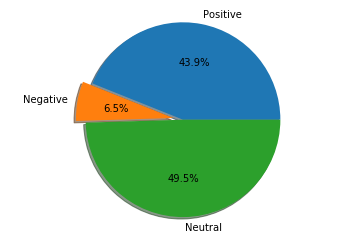

In [23]:
fig1,ax1 = plt.subplots()
explode = (0,0.1,0)
labels='Positive','Negative','Neutral'
sizes = [positive,negative,neutral]
ax1.pie(sizes,explode = explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=0)
ax1.axis('equal')
plt.show()

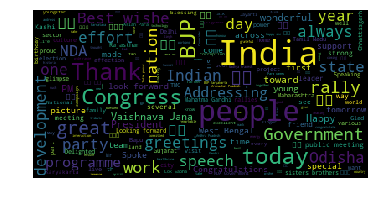

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "now", "go", "Ji", "many", "Dear", "Shri", "watch"])

wordcloud_hc = WordCloud(max_font_size=40,relative_scaling=0.5,stopwords=stopwords,background_color='black').generate(data['Cleaned_tweet'].str.cat())
plt.imshow(wordcloud_hc)
plt.axis('off')
plt.show()

In [32]:
#Let's get word frequency 
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
stop_words.update(["I", "The","के", "की","को","में", "का", "और","है।", "से","in", "a", "ji", "पर", "shri","है", "लिए", "ji.","ने", "also", "towards"])

counts = {}
for text in data.Cleaned_tweet:
        for word in text.split():
            if word.lower() in stop_words:
                continue
            else:
                counts[word.lower()]=counts.get(word.lower(),0)+1

lst=[]

for key,val in counts.items():
    newtup=(val, key)
    lst.append(newtup)

lst=sorted(lst, reverse=True)

count_num=[]
value=[]
for val, key in lst[:15]:
    count_num.append(key)
    value.append(val)
    print(key, val)
 
print("-------------------------------")
print()
print(f"Number of times he mentioned Ram: {counts['ram']}")
print(f"Number of times he mentioned Bengal: {counts['bengal']}")
print(f"Number of times he mentioned Bihar: {counts['bihar']}")
print(f"Number of times he mentioned Hindu: {counts['hindu']}")

people 220
india 218
thank 189
watch. 137
congress 126
bjp 113
watch 107
rally 104
great 101
government 92
addressing 84
happy 81
best 79
forward 78
president 73
-------------------------------

Number of times he mentioned Ram: 5
Number of times he mentioned Bengal: 27
Number of times he mentioned Bihar: 10
Number of times he mentioned Hindu: 1


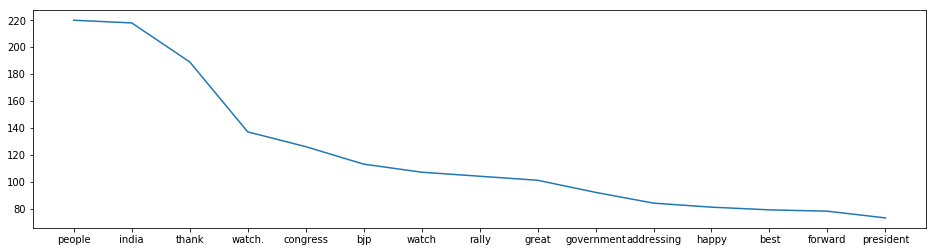

In [33]:
len(count_num)
plt.figure(figsize=[16,4])
plt.plot(count_num, value)

Text(0.5, 1.0, 'Correlation between tweet features')

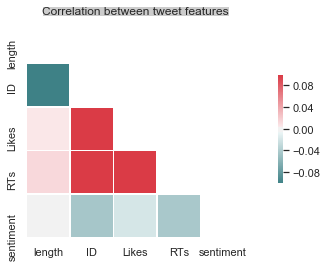

In [34]:
#Correlation plot to understand chracateristic of liked and retweeted tweets 

import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(920, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation between tweet features', bbox={'facecolor':'0.8', 'pad':0})

### Insights
- RT and Likes are highly correlated
- Medium length tweets result in more retweets and likes for Mr. Modi 
- This is controversial. Tweets of Mr. Modi with negative sentiment often get more RTs and Likes. However, it may have to do with epressing regrests over unfortunate events

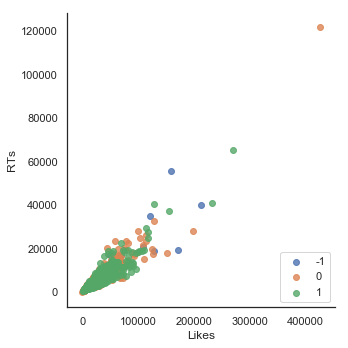

In [37]:
import seaborn as sns

sns.lmplot(x='Likes',y='RTs',data=data,fit_reg=False,hue='sentiment',legend=False)

plt.legend(loc=4)
plt.show()